In [4]:
#Let's load the relevant libraries (İlgili kütüphaneleri yükleyelim);

import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

2.Data Loading

In [6]:
df=pd.read_csv("retail_price.csv")
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [7]:
df.tail()


,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000
675,bed5,bed_bath_table,01-09-2017,32,5222.36,24.324687,163.398710,56,162,5,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,199.509804


3.EDA

In [8]:
df.shape
# Our dataset consists of 676 observations and 30 attributes
# Verisetimiz 676 gözlem ve 30 öznitelikten oluşmaktadır

(676, 30)

In [9]:
df.columns


Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [10]:
df.dtypes


product_id                     object
product_category_name          object
month_year                     object
qty                             int64
total_price                   float64
freight_price                 float64
unit_price                    float64
product_name_lenght             int64
product_description_lenght      int64
product_photos_qty              int64
product_weight_g                int64
product_score                 float64
customers                       int64
weekday                         int64
weekend                         int64
holiday                         int64
month                           int64
year                            int64
s                             float64
volume                          int64
comp_1                        float64
ps1                           float64
fp1                           float64
comp_2                        float64
ps2                           float64
fp2                           float64
comp_3      

In [11]:
# structural information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [12]:
#unique value counts

df.nunique()

product_id                     52
product_category_name           9
month_year                     20
qty                            66
total_price                   573
freight_price                 653
unit_price                    280
product_name_lenght            24
product_description_lenght     46
product_photos_qty              7
product_weight_g               45
product_score                  11
customers                      94
weekday                         4
weekend                         3
holiday                         5
month                          12
year                            2
s                             450
volume                         40
comp_1                         88
ps1                             9
fp1                           179
comp_2                        123
ps2                            10
fp2                           242
comp_3                        105
ps3                             9
fp3                           229
lag_price     

In [13]:
df.drop("product_id",axis=1,inplace=True)


In [14]:
# describe

df.describe([0.05,0.1,0.25,0.35,0.5,0.65,0.75,0.9,0.95]).T

,count,mean,std,min,5%,10%,25%,35%,50%,65%,75%,90%,95%,max
qty,676.0,14.495562,15.443421,1.000000,1.000000,2.000000,4.000000,6.000000,10.000000,14.000000,18.000000,31.500000,44.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,99.987500,154.700000,333.700000,490.670000,807.890000,1337.655000,1887.322500,3460.290000,4756.425000,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,10.978500,12.483421,14.761912,15.853265,17.518472,19.540750,22.713558,36.134119,42.077857,79.76
unit_price,676.0,106.496800,76.182972,19.900000,29.900000,36.527143,53.900000,59.900000,89.900000,105.000000,129.990000,186.907143,325.000000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,33.000000,33.000000,40.000000,46.000000,51.000000,56.000000,57.000000,59.000000,59.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,178.000000,236.000000,339.000000,363.000000,501.000000,735.000000,903.000000,1893.000000,2188.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000,2.000000,2.000000,4.000000,5.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,150.000000,200.000000,348.000000,444.000000,950.000000,1550.000000,1850.000000,6050.000000,6550.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.700000,3.800000,3.900000,4.100000,4.100000,4.200000,4.200000,4.300000,4.400000,4.50
customers,676.0,81.028107,62.055560,1.000000,10.000000,17.000000,34.000000,43.000000,62.000000,102.000000,116.000000,159.000000,179.500000,339.00


In [15]:
df.sort_values("total_price",ascending=False).head(15) #total price highest


,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
673,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,9750,...,89.900000,3.9,13.993833,205.000000,4.4,22.195932,45.950000,4.0,14.840000,209.000000
277,watches_gifts,01-05-2018,114,11820.20,0.095439,103.792523,33,523,3,584,...,103.792523,4.2,0.095439,105.000000,4.2,11.377297,132.531250,3.8,15.762187,105.648625
674,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,9750,...,89.900000,3.9,14.656757,199.509804,4.4,19.412885,45.950000,4.0,14.287500,205.000000
175,computers_accessories,01-02-2018,69,10343.10,26.552899,149.900000,48,894,1,533,...,149.000000,4.2,41.163226,149.900000,4.3,26.552899,78.712281,3.5,14.535915,150.354546
549,health_beauty,01-08-2018,28,9240.00,20.505357,330.000000,60,2644,6,400,...,23.990000,4.3,16.770000,82.821429,4.1,12.418571,58.990000,3.9,12.083333,330.000000
544,health_beauty,01-03-2018,28,9125.00,19.370357,325.892857,60,2644,6,400,...,23.990000,4.3,14.198750,83.740000,4.1,11.876875,58.990000,3.9,15.228000,325.000000
276,watches_gifts,01-04-2018,85,8961.49,2.181647,105.648625,33,523,3,584,...,105.648625,4.2,2.181647,105.000000,4.2,13.631429,150.133333,3.8,19.447778,117.441290
499,furniture_decor,01-01-2018,122,8538.00,17.663115,69.995327,44,903,6,2600,...,69.995327,4.1,17.663115,38.400000,3.7,9.340000,99.900000,4.4,22.819231,75.000000
178,computers_accessories,01-05-2018,52,7794.80,18.943077,149.900000,48,894,1,533,...,119.000000,4.2,39.217200,149.900000,4.3,18.943077,79.800000,3.5,14.414545,149.900000
612,watches_gifts,01-07-2018,45,7651.27,17.953556,169.349318,46,501,4,363,...,118.363636,4.2,15.480000,105.000000,4.2,24.938750,155.000000,3.8,16.470000,245.900000


In [16]:
df.sort_values("total_price",ascending=True).head(15) #total price lowest


,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
329,consoles_games,01-07-2017,1,19.90,11.85,19.90,56,237,3,100,...,19.900000,4.2,13.473077,19.900000,3.9,11.850000,19.900000,3.9,11.850000,19.850000
281,cool_stuff,01-09-2017,1,29.50,11.73,29.50,57,787,8,1867,...,99.990000,4.2,15.933333,29.500000,4.4,11.730000,29.500000,4.4,11.730000,29.450000
623,health_beauty,01-10-2017,1,29.90,11.85,29.90,55,388,1,250,...,23.990000,4.3,13.136667,89.990000,4.1,16.562917,58.990000,3.9,19.065263,29.850000
336,consoles_games,01-02-2018,1,32.50,11.85,32.50,56,237,3,100,...,32.500000,4.2,15.256000,32.500000,3.9,11.850000,32.500000,3.9,11.850000,27.033333
468,furniture_decor,01-08-2018,1,35.00,19.44,35.00,41,789,1,950,...,103.233333,4.1,22.300000,35.000000,3.7,15.628125,83.833333,4.4,23.776667,34.950000
41,consoles_games,01-07-2018,1,36.20,22.18,36.20,49,100,4,150,...,36.200000,4.2,22.180000,36.200000,4.2,22.180000,36.200000,4.2,22.180000,36.200000
524,furniture_decor,01-07-2017,1,38.40,7.78,38.40,49,829,1,850,...,75.000000,4.1,15.856000,38.400000,3.7,7.780000,38.400000,3.7,7.780000,38.350000
457,furniture_decor,01-08-2017,1,38.40,11.85,38.40,41,789,1,950,...,75.000000,4.1,15.376923,38.400000,3.7,12.105000,38.400000,3.8,11.850000,38.350000
0,bed_bath_table,01-05-2017,1,45.95,15.10,45.95,39,161,2,350,...,89.900000,3.9,15.011897,215.000000,4.4,8.760000,45.950000,4.0,15.100000,45.900000
75,health_beauty,01-08-2018,2,47.98,16.77,23.99,48,575,1,100,...,23.990000,4.3,16.770000,82.821429,4.1,12.418571,58.990000,3.9,12.083333,23.990000


4.Data Preprocessing


In [17]:
df.isna().sum()


product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

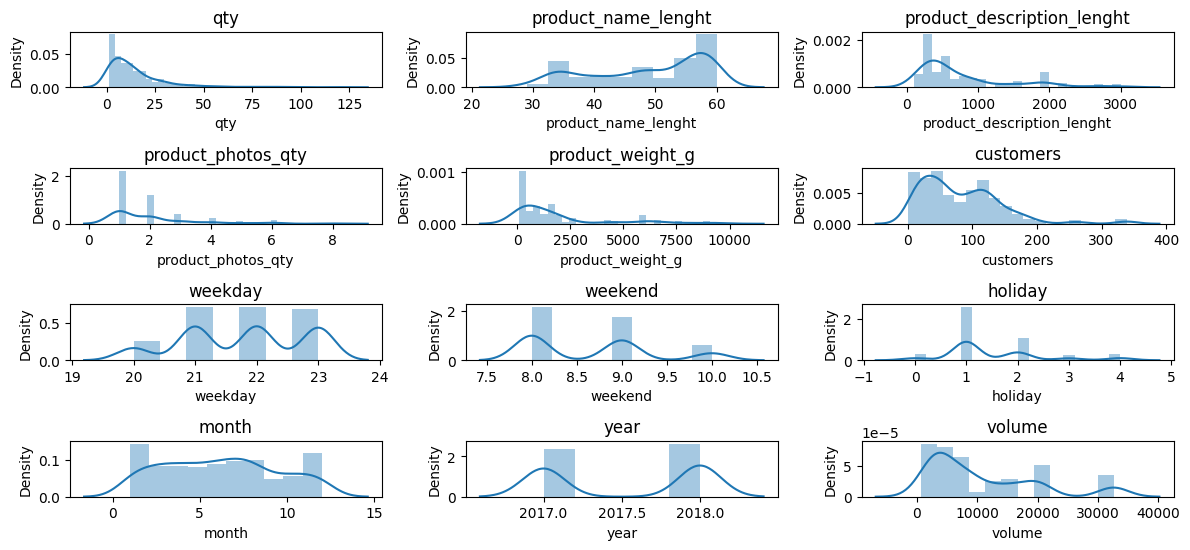

In [18]:
# let's look at the distribution states of numeric variables;
# sayısal değişkenlerin dağılım durumlarına bakalım;
k=1
plt.figure(figsize=(12,12))

for i in df.select_dtypes("int"):
    plt.subplot(9,3,k)
    sns.distplot(df[i])
    plt.title(i)
    k+=1
    plt.tight_layout()

In [ ]:
Let's try 2 different approaches, 1st let's not touch the outliers, 2nd remove the outliers and make a copy, then compare

2 farklı yaklaşım deneyelim,1.si aykırı değerlere dokunmayalım,2.si aykırı değerleri kaldırıp bir kopyasını alalım,daha sonra karşılaştıralım

In [19]:
df.describe([0.05,0.1,0.25,0.35,0.5,0.65,0.75,0.9,0.95]).T


,count,mean,std,min,5%,10%,25%,35%,50%,65%,75%,90%,95%,max
qty,676.0,14.495562,15.443421,1.000000,1.000000,2.000000,4.000000,6.000000,10.000000,14.000000,18.000000,31.500000,44.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,99.987500,154.700000,333.700000,490.670000,807.890000,1337.655000,1887.322500,3460.290000,4756.425000,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,10.978500,12.483421,14.761912,15.853265,17.518472,19.540750,22.713558,36.134119,42.077857,79.76
unit_price,676.0,106.496800,76.182972,19.900000,29.900000,36.527143,53.900000,59.900000,89.900000,105.000000,129.990000,186.907143,325.000000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,33.000000,33.000000,40.000000,46.000000,51.000000,56.000000,57.000000,59.000000,59.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,178.000000,236.000000,339.000000,363.000000,501.000000,735.000000,903.000000,1893.000000,2188.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000,2.000000,2.000000,4.000000,5.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,150.000000,200.000000,348.000000,444.000000,950.000000,1550.000000,1850.000000,6050.000000,6550.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.700000,3.800000,3.900000,4.100000,4.100000,4.200000,4.200000,4.300000,4.400000,4.50
customers,676.0,81.028107,62.055560,1.000000,10.000000,17.000000,34.000000,43.000000,62.000000,102.000000,116.000000,159.000000,179.500000,339.00


In [20]:
df_outlier_remove=df.copy()


In [21]:
outlier_list=["qty","customers","comp_1","comp_3"]


for i in df_outlier_remove.loc[:,outlier_list]:
    Q1 = df_outlier_remove[i].quantile(0.10)
    Q3 = df_outlier_remove[i].quantile(0.90)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df_outlier_remove[(df_outlier_remove[i] > up) | (df_outlier_remove[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

qty yes
customers no
comp_1 yes
comp_3 no


In [ ]:
# We detected outliers in columns gty and comp_1
# gty ve comp_1 kolonlarında aykırı değerler tespit ettik

In [22]:
#reach outliers;

def outliers_train(df_outlier_remove):
    q1,q3=np.percentile(df_outlier_remove,[10,90])
    ıqr=q3-q1
    low,high=q1-1.5*(ıqr),q3+1.5*(ıqr)
    outliers_train=[i for i in df_outlier_remove if i<low or i>high]
    return outliers_train

In [23]:
outliers_train(df.qty)
# There are 9 outliers (for qty)
# 9 tane aykırı değer var (qty için)

[87, 91, 82, 85, 114, 76, 122, 83, 92]

In [24]:
outliers_train(df.comp_1)
# 3 tane aykırı değerimiz var(comp_1)
# We have 3 outliers (comp_1)

[349.9, 349.9, 339.9]

In [25]:
# let's eliminate outliers
# aykırı değerleri ortadan kaldıralım
# remove outliers;
for i in df_outlier_remove.loc[:,outlier_list]:
    
    Q1 = df_outlier_remove[i].quantile(0.10)
    Q3 = df_outlier_remove[i].quantile(0.90)
    IQR = Q3 - Q1
    up_lim=Q3+1.5 *IQR
    low_lim=Q1-1.5 *IQR
    
    df_outlier_remove.loc[df_outlier_remove[i]>up_lim,i]=up_lim
    df_outlier_remove.loc[df_outlier_remove[i]<low_lim,i]=low_lim

In [26]:
for i in df_outlier_remove.loc[:,outlier_list]:
    Q1 = df_outlier_remove[i].quantile(0.10)
    Q3 = df_outlier_remove[i].quantile(0.90)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df_outlier_remove[(df_outlier_remove[i] > up) | (df_outlier_remove[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

# aykırı değerleri ortadan kaldırdık
# we eliminated outliers

qty no
customers no
comp_1 no
comp_3 no


In [ ]:
Time Series Analysis

In [27]:
from datetime import datetime
df["month_year"] = pd.to_datetime(df.month_year)
df["day"]=df["month_year"].dt.day
df.head()

,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,day
0,bed_bath_table,2017-01-05,1,45.95,15.100000,45.95,39,161,2,350,...,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90,5
1,bed_bath_table,2017-01-06,3,137.85,12.933333,45.95,39,161,2,350,...,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95,6
2,bed_bath_table,2017-01-07,6,275.70,14.840000,45.95,39,161,2,350,...,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95,7
3,bed_bath_table,2017-01-08,4,183.80,14.287500,45.95,39,161,2,350,...,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95,8
4,bed_bath_table,2017-01-09,2,91.90,15.100000,45.95,39,161,2,350,...,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95,9


In [28]:
custgroup=df.groupby('month_year').mean()
plt.figure(figsize=(12,5))
custgroup['lag_price'].plot(x=df.month_year)
plt.title("lag_price status")
plt.show()

TypeError: Could not convert health_beautyhealth_beauty to numeric

In [29]:
custgroup=df.groupby('day').mean()
fig,ax=plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,31))
custgroup['lag_price'].plot(x=df.month_year)
plt.title("lag_price status by day")
plt.show()

TypeError: Could not convert bed_bath_tablegarden_toolsgarden_toolshealth_beautycool_stuffhealth_beautyperfumerycool_stuffhealth_beautygarden_toolscomputers_accessoriesgarden_toolscomputers_accessorieshealth_beautygarden_toolswatches_giftshealth_beautygarden_toolsgarden_toolscool_stuffperfumerycool_stuffcomputers_accessoriesconsoles_gameshealth_beautyhealth_beautywatches_giftsfurniture_decorwatches_giftshealth_beautyhealth_beautybed_bath_tablegarden_toolsbed_bath_tablefurniture_decorwatches_giftswatches_giftsfurniture_decorgarden_toolsfurniture_decorhealth_beautygarden_toolscool_stuffcomputers_accessorieswatches_giftscomputers_accessorieshealth_beautywatches_giftscomputers_accessoriesbed_bath_table to numeric

In [30]:
# month_year kolonunu atalım;

df.drop("month_year",axis=1,inplace=True)
df.head(2)

,product_category_name,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,...,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,day
0,bed_bath_table,1,45.95,15.100000,45.95,39,161,2,350,4.0,...,3.9,15.011897,215.0,4.4,8.760,45.95,4.0,15.100000,45.90,5
1,bed_bath_table,3,137.85,12.933333,45.95,39,161,2,350,4.0,...,3.9,14.769216,209.0,4.4,21.322,45.95,4.0,12.933333,45.95,6


In [31]:
# let's do the same updates in df_remove_outlier
# aynı güncellemeleri df_remove_outlier içinde yapalım
df_outlier_remove["month_year"] = pd.to_datetime(df_outlier_remove.month_year)
df_outlier_remove["day"]=df_outlier_remove["month_year"].dt.day
df_outlier_remove.drop("month_year",axis=1,inplace=True)
df_outlier_remove.head(2)

,product_category_name,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,...,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,day
0,bed_bath_table,1.0,45.95,15.100000,45.95,39,161,2,350,4.0,...,3.9,15.011897,215.0,4.4,8.760,45.95,4.0,15.100000,45.90,5
1,bed_bath_table,3.0,137.85,12.933333,45.95,39,161,2,350,4.0,...,3.9,14.769216,209.0,4.4,21.322,45.95,4.0,12.933333,45.95,6


In [ ]:
Data Visualize

In [32]:
plt.figure(figsize=(8,8))
sns.countplot(df.product_category_name);

ValueError: could not convert string to float: 'bed_bath_table'

<Figure size 800x800 with 0 Axes>

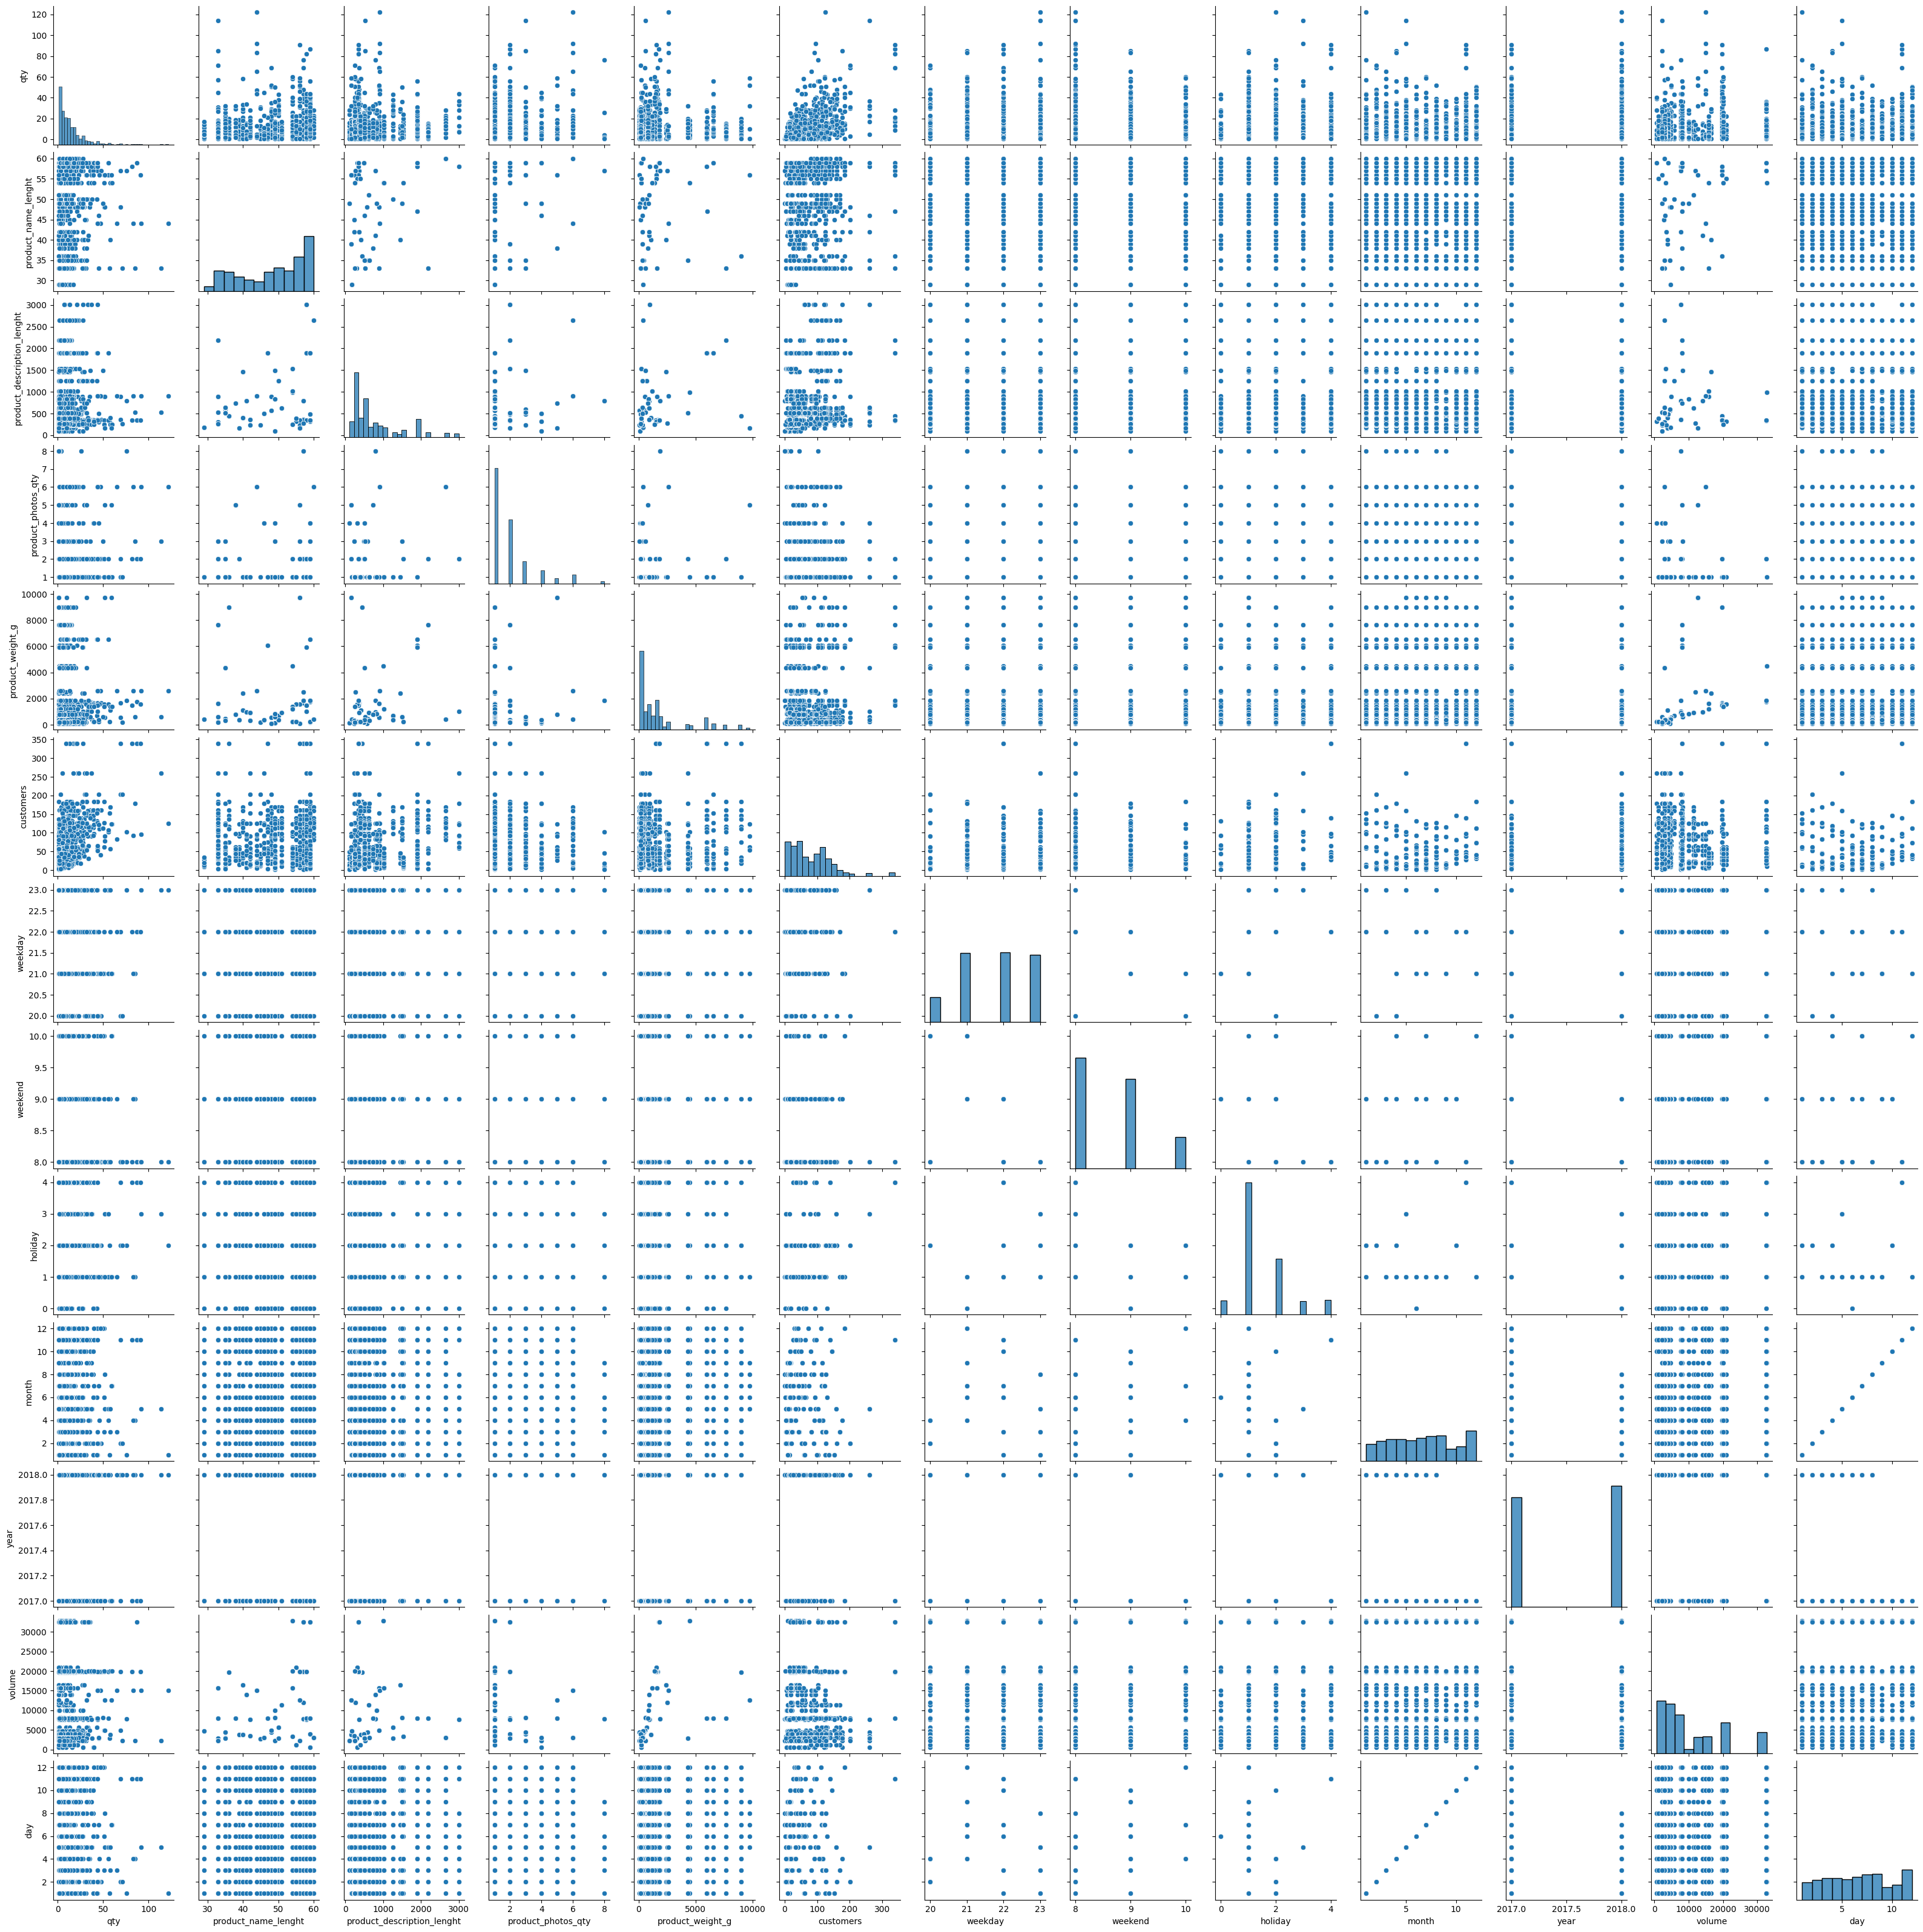

In [33]:
sns.pairplot(df.select_dtypes("int"));

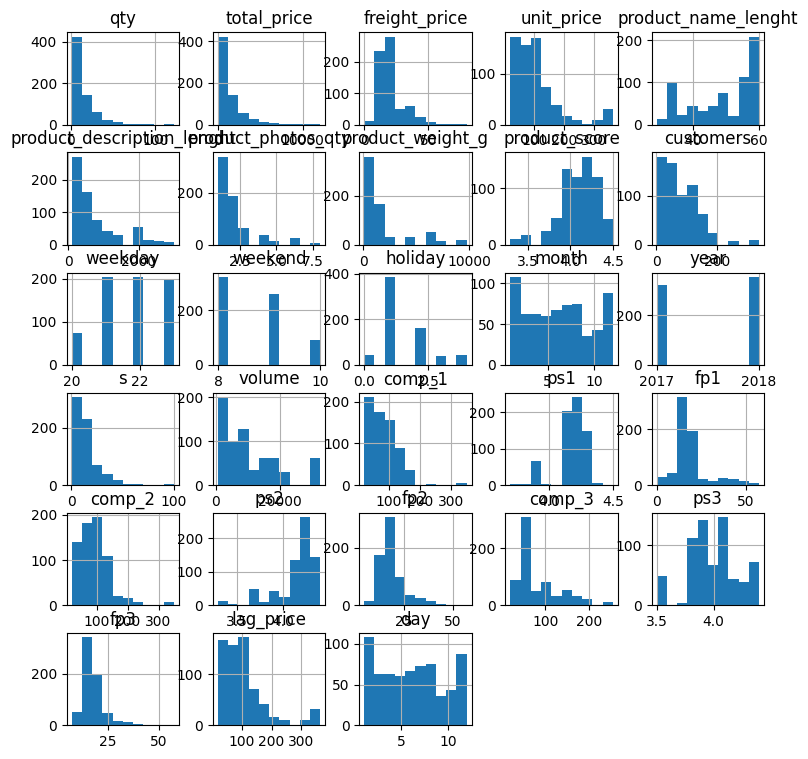

In [34]:
df.hist(figsize=(9,9));

Encoding

In [35]:
## One Hot Encoding İşlemi;

dms=pd.get_dummies(df["product_category_name"])
dms

,bed_bath_table,computers_accessories,consoles_games,cool_stuff,furniture_decor,garden_tools,health_beauty,perfumery,watches_gifts
0,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
671,True,False,False,False,False,False,False,False,False
672,True,False,False,False,False,False,False,False,False
673,True,False,False,False,False,False,False,False,False
674,True,False,False,False,False,False,False,False,False


In [36]:
df.drop("product_category_name",axis=1,inplace=True)

In [37]:
df=pd.concat([df,dms],axis=1)

In [38]:
df.head()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,day,bed_bath_table,computers_accessories,consoles_games,cool_stuff,furniture_decor,garden_tools,health_beauty,perfumery,watches_gifts
0,1,45.95,15.100000,45.95,39,161,2,350,4.0,57,...,5,True,False,False,False,False,False,False,False,False
1,3,137.85,12.933333,45.95,39,161,2,350,4.0,61,...,6,True,False,False,False,False,False,False,False,False
2,6,275.70,14.840000,45.95,39,161,2,350,4.0,123,...,7,True,False,False,False,False,False,False,False,False
3,4,183.80,14.287500,45.95,39,161,2,350,4.0,90,...,8,True,False,False,False,False,False,False,False,False
4,2,91.90,15.100000,45.95,39,161,2,350,4.0,54,...,9,True,False,False,False,False,False,False,False,False


In [39]:
# remove outlier for;

dms2=pd.get_dummies(df_outlier_remove["product_category_name"])
df_outlier_remove.drop("product_category_name",axis=1,inplace=True)
df_outlier_remove=pd.concat([df_outlier_remove,dms2],axis=1)

Corelation Analysis

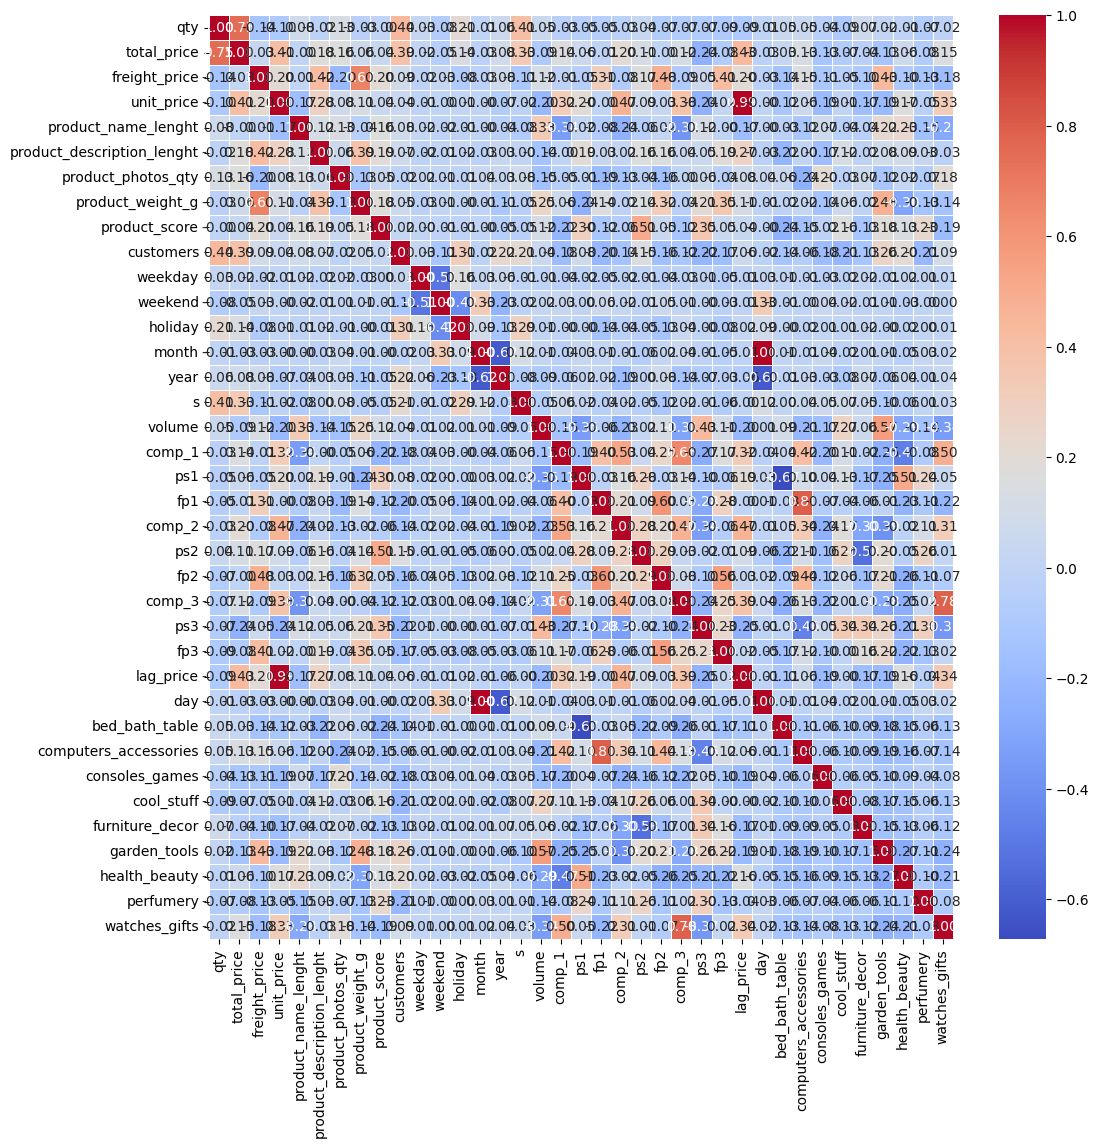

In [40]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
plt.show()

In [41]:
cor=df.corr()["lag_price"].sort_values(ascending=False)
pd.DataFrame({"column":cor.index,"Correlation with lag_price":cor.values})

,column,Correlation with lag_price
0,lag_price,1.000000
1,unit_price,0.994453
2,comp_2,0.465271
3,total_price,0.426256
4,comp_3,0.385621
5,watches_gifts,0.335569
6,comp_1,0.322348
7,product_description_lenght,0.273883
8,freight_price,0.201143
9,ps1,0.194805


In [42]:
df.drop(["unit_price","day"],axis=1,inplace=True)

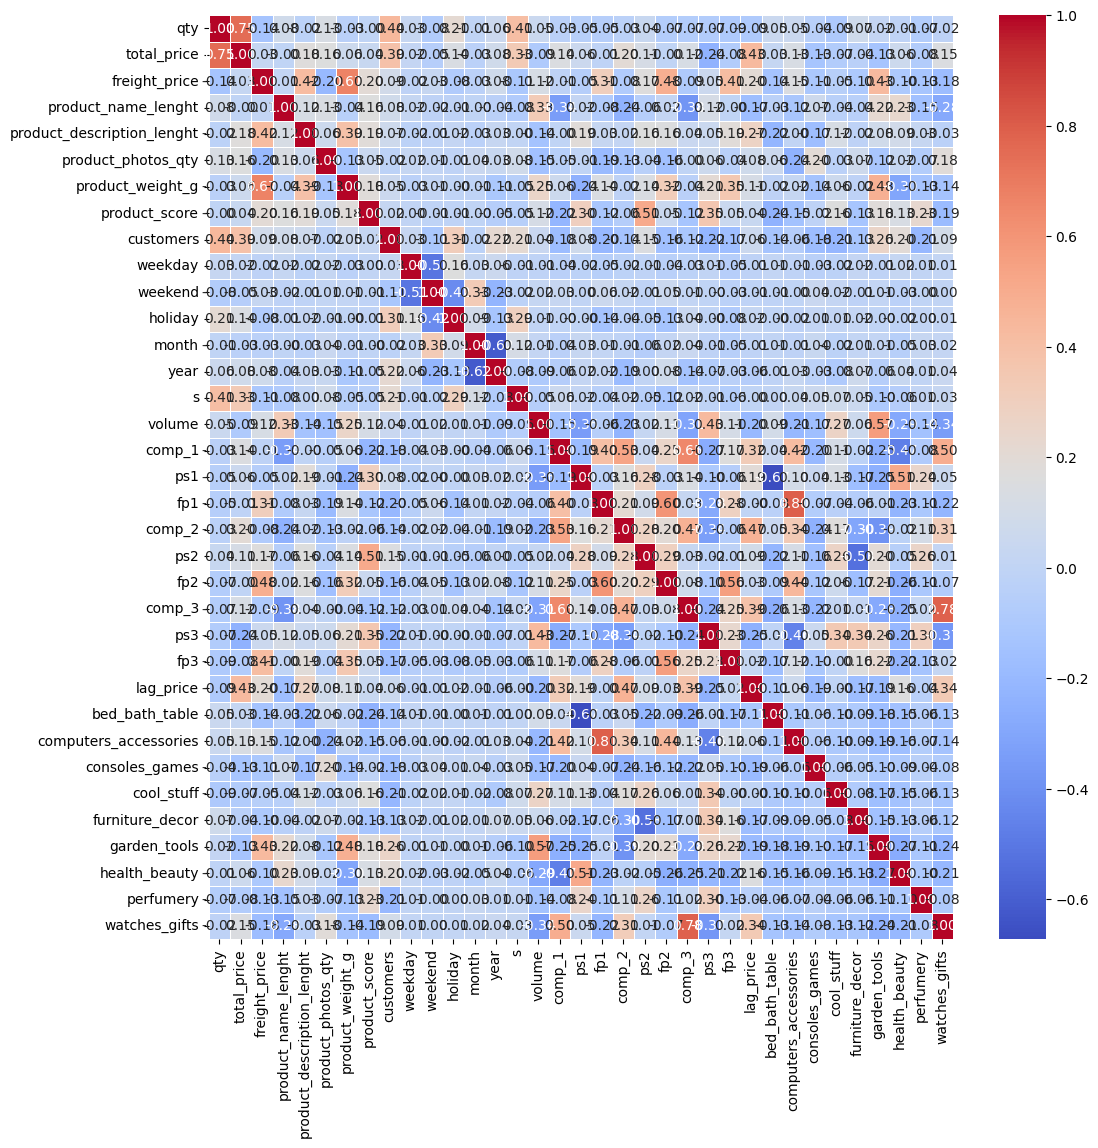

In [43]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
plt.show()

In [44]:
# df_remove outlier;

df_outlier_remove.drop(["unit_price","day"],axis=1,inplace=True)

5.Modelling

In [45]:
X=df.drop("lag_price",axis=1)
y=df["lag_price"] 

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
# pip install catboost
# pip install lightgbm
# pip install xgboost

In [47]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [48]:
ridge=Ridge().fit(X_train,y_train)
lasso=Lasso().fit(X_train,y_train)
enet=ElasticNet().fit(X_train,y_train)
knn=KNeighborsRegressor().fit(X_train,y_train)
ada=AdaBoostRegressor().fit(X_train,y_train)
svm=SVR().fit(X_train,y_train)
mlpc=MLPRegressor().fit(X_train,y_train)
dtc=DecisionTreeRegressor().fit(X_train,y_train)
rf=RandomForestRegressor().fit(X_train,y_train)
xgb=XGBRegressor().fit(X_train,y_train)
gbm=GradientBoostingRegressor().fit(X_train,y_train)
lgb=LGBMRegressor().fit(X_train,y_train)
catbost=CatBoostRegressor().fit(X_train,y_train)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1317
[LightGBM] [Info] Number of data points in the train set: 473, number of used features: 33
[LightGBM] [Info] Start training from score 107.249281
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [49]:
models=[ridge,lasso,enet,knn,ada,svm,mlpc,dtc,rf,xgb,gbm,lgb,catbost]

def ML(y,models):
    accuary=models.score(X_train,y_train)
    return accuary

In [50]:
for i in models:
     print(i,"Algorithm succed rate :",ML("survived",i))

Ridge() Algorithm succed rate : 0.6987588727620251
Lasso() Algorithm succed rate : 0.6815198367914466
ElasticNet() Algorithm succed rate : 0.6597231666932604
KNeighborsRegressor() Algorithm succed rate : 0.8677431752985709
AdaBoostRegressor() Algorithm succed rate : 0.912195933624315
SVR() Algorithm succed rate : 0.025724718616277675
MLPRegressor() Algorithm succed rate : 0.6569704580443858
DecisionTreeRegressor() Algorithm succed rate : 1.0
RandomForestRegressor() Algorithm succed rate : 0.987336585967843
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
           